In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical


'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/faces.npy'

In [2]:
sketch_data = {'mouth' : np.load('./INPUT/mouth.npy'),'nose': np.load('./INPUT/nose.npy'), 'eyes' : np.load('./INPUT/eye.npy'),
              'eyeglasses': np.load('./INPUT/eyeglasses.npy'), 'hat': np.load('./INPUT/hat.npy')}

In [81]:
print(sketch_data['mouth'].shape)
print(sketch_data['nose'].shape)
print(sketch_data['eyes'].shape)
print(sketch_data['eyeglasses'].shape)
print(sketch_data['hat'].shape)

(134135, 784)
(197573, 784)
(125888, 784)
(225762, 784)
(222610, 784)


In [3]:
X = np.concatenate([sketch_data['mouth'], sketch_data['nose'], sketch_data['eyes'], sketch_data['eyeglasses'], sketch_data['hat']])

In [20]:
X= np.array([e.reshape((28,28)) for e in X])

In [6]:
#np.save('X_clean.npy', X)

In [44]:
from sklearn import preprocessing

def create_x(dic):
    X = np.concatenate([[e for e in k] for k in dict])
    return np.array([e.reshape((28,28)) for e in X])
    
    
def y_encoder(y):
    le = preprocessing.LabelEncoder()
    le.fit(list(set(y)))
    print(le.classes_)
    return le.transform(y)

def create_y(dic):
    y = []
    for k in dic:
        y.append(np.repeat(k, len(dic[k])))
    return y_encoder(np.concatenate(y))


In [45]:
y = create_y(sketch_data)

['eyeglasses' 'eyes' 'hat' 'mouth' 'nose']


In [121]:
np.save('y.npy', y)

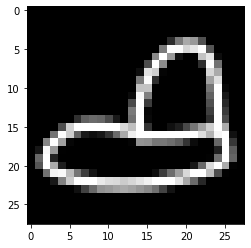

In [46]:
plt.imshow(X[700000], cmap='gray')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape,X_test.shape)

(724774, 28, 28) (181194, 28, 28)


In [48]:
num_classes = 5 # We have 10 classes
img_rows, img_cols = 28, 28 # Input image dimensions

In [49]:
# Ask keras which data format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print(f"We have data prepared for backend [{keras.backend.backend()}]")
print(input_shape)  

We have data prepared for backend [tensorflow]
(28, 28, 1)


In [50]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (724774, 28, 28, 1)
724774 train samples
181194 test samples


In [51]:

# Convert class vectors to binary class matrices, like get_dummies on pandas
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [116]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [117]:
loss_function = keras.losses.categorical_crossentropy
optimizer = keras.optimizers.Adadelta()

model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

In [120]:
batch_size = 128 # Train in batches of 128 images
epochs = 10 # Iterate over all data 4 times

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 366076 samples, validate on 91520 samples
Epoch 1/4
366076/366076 [==============================] - 620s 2ms/step - loss: 0.1424 - accuracy: 0.9488 - val_loss: 0.0931 - val_accuracy: 0.9666
Epoch 2/4
366076/366076 [==============================] - 620s 2ms/step - loss: 0.0976 - accuracy: 0.9659 - val_loss: 0.0837 - val_accuracy: 0.9696
Epoch 3/4
366076/366076 [==============================] - 626s 2ms/step - loss: 0.0872 - accuracy: 0.9696 - val_loss: 0.0758 - val_accuracy: 0.9731
Epoch 4/4
366076/366076 [==============================] - 638s 2ms/step - loss: 0.0813 - accuracy: 0.9715 - val_loss: 0.0719 - val_accuracy: 0.9748


In [122]:
# Evaluate the model with test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07190170294008465
Test accuracy: 0.9747924208641052


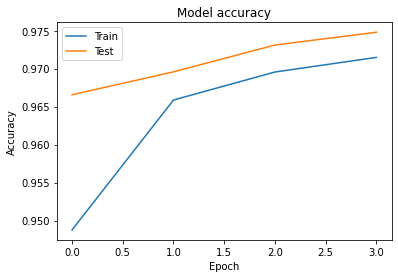

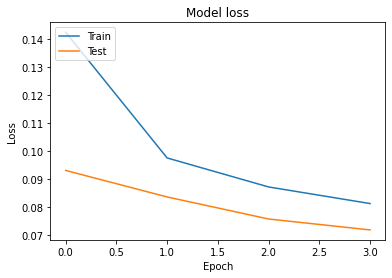

In [125]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [126]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [3]:
model.save("./OUTPUT/model_sketch.h5")

NameError: name 'model' is not defined

In [53]:
from keras.models import load_model
model = load_model("./OUTPUT/model_sketch.h5")

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:
#Invert (black over white) and reshape the images :
sketch_data[k] = np.array([np.array([255-i for i in e]).reshape((28,28)) for e in sketch_data[k]]) 

In [61]:
test = sketch_data['nose'][258].reshape(1, 28, 28,1)

In [118]:
from PIL import Image
def process_input(path):
    im = Image.open(path)
    im = test_custom.resize((28,28),Image.ANTIALIAS)
    im = np.asarray(im.convert('L'))
    im = np.array([255-i for i in im])
    plt.imshow(im, cmap='gray')
    return im.reshape(1,28, 28,1)

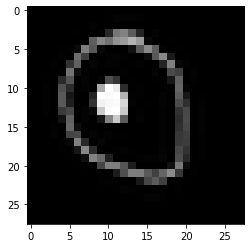

In [119]:
im = process_input('../../../../Downloads/eye_test.jpg')

In [112]:
model.predict(im)

array([[0., 0., 1.]], dtype=float32)